In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('weatherHistory.csv')

In [3]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [5]:
df.shape

(96453, 12)

In [6]:
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

# EDA AND PREPROCESSING 

<Axes: xlabel='Temperature (C)', ylabel='Count'>

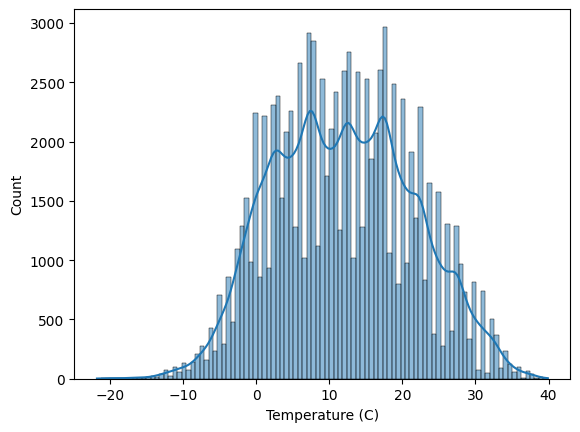

In [7]:
sns.histplot(df['Temperature (C)'],kde=True)

In [8]:
df.corr(numeric_only=True)

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
Temperature (C),1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,NaN,-0.005447
Apparent Temperature (C),0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,NaN,-0.000219
Humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,NaN,0.005454
Wind Speed (km/h),0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,NaN,-0.049263
Wind Bearing (degrees),0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,NaN,-0.011651
Visibility (km),0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,NaN,0.059818
Loud Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pressure (millibars),-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,NaN,1.000000


In [9]:
df=df.drop(columns=['Loud Cover'])


In [10]:
df.head(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.


In [11]:
df=df.drop(columns=['Pressure (millibars)'])

In [12]:
df.head(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,Partly cloudy throughout the day.


In [13]:
df = df.drop(columns=['Wind Bearing (degrees)'])

In [14]:
df.head(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,15.8263,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,15.8263,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,14.9569,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,15.8263,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,15.8263,Partly cloudy throughout the day.


<Axes: >

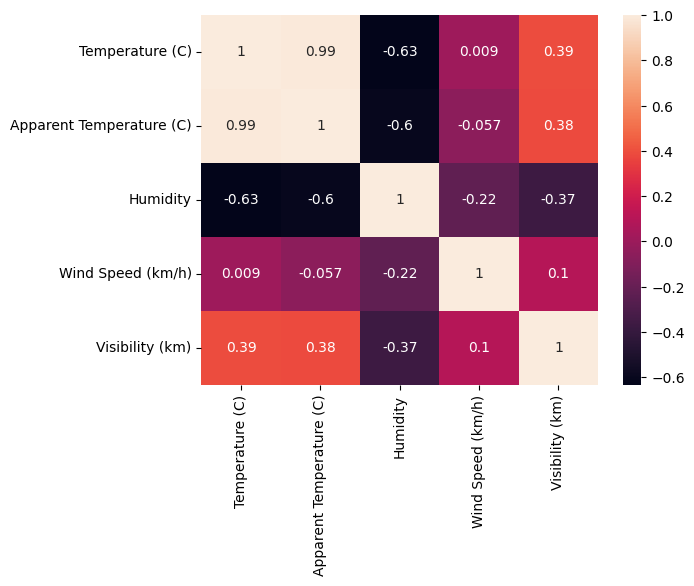

In [15]:
sns.heatmap(df.corr(numeric_only = True),annot = True)

In [16]:
features = ['Humidity', 'Wind Speed (km/h)', 'Visibility (km)', 'Apparent Temperature (C)']
target = 'Temperature (C)'

plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

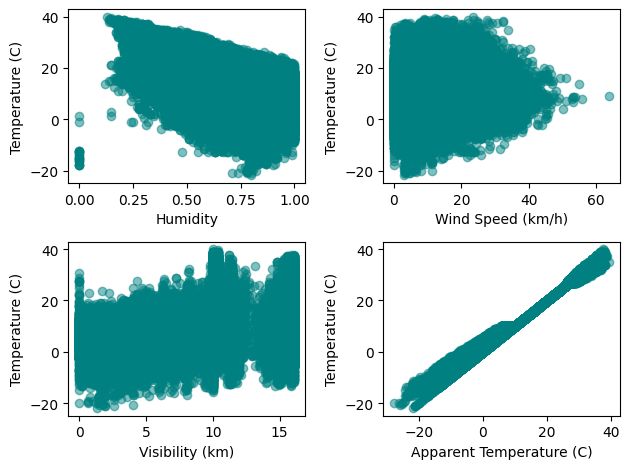

In [17]:
for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)  # 2 rows, 2 columns
    plt.scatter(df[feature], df[target], alpha=0.5, color='teal')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.tight_layout()

In [18]:
plt.show()


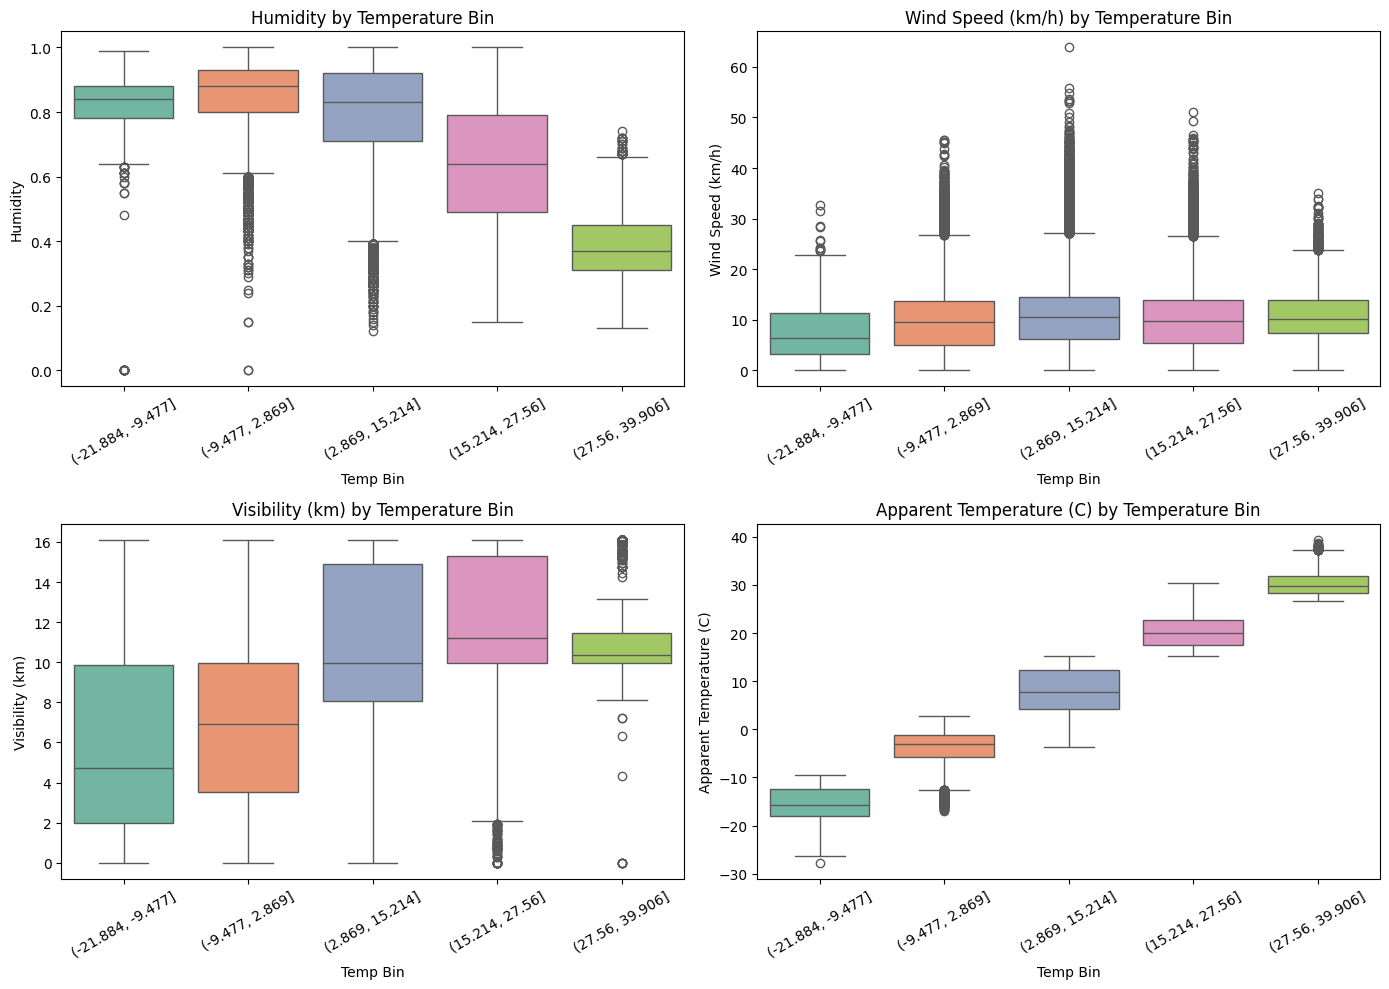

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Bin temperature into categories
df['Temp Bin'] = pd.cut(df['Temperature (C)'], bins=5)

# Features to check against temperature bins
features = ['Humidity', 'Wind Speed (km/h)', 'Visibility (km)', 'Apparent Temperature (C)']

plt.figure(figsize=(14, 10))

for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='Temp Bin', y=feature, data=df, palette="Set2")
    plt.xticks(rotation=30)
    plt.title(f'{feature} by Temperature Bin')
    plt.tight_layout()

plt.show()



In [20]:
df.head(2)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Daily Summary,Temp Bin
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,15.8263,Partly cloudy throughout the day.,"(2.869, 15.214]"
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,15.8263,Partly cloudy throughout the day.,"(2.869, 15.214]"


In [24]:

df['Formatted Date'] = pd.to_datetime(df['Formatted Date'],utc=True)
df['Hour'] = df['Formatted Date'].dt.hour
df['Month'] = df['Formatted Date'].dt.month
df['Day'] = df['Formatted Date'].dt.day
df['Weekday'] = df['Formatted Date'].dt.dayofweek

In [25]:
df.drop(columns=['Formatted Date'], inplace=True)


In [26]:
df.head(5)

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Daily Summary,Temp Bin,Hour,Month,Day,Weekday
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,15.8263,Partly cloudy throughout the day.,"(2.869, 15.214]",22,3,31,4
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,15.8263,Partly cloudy throughout the day.,"(2.869, 15.214]",23,3,31,4
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,14.9569,Partly cloudy throughout the day.,"(2.869, 15.214]",0,4,1,5
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,15.8263,Partly cloudy throughout the day.,"(2.869, 15.214]",1,4,1,5
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,15.8263,Partly cloudy throughout the day.,"(2.869, 15.214]",2,4,1,5


In [27]:
df.drop(columns=['Temp Bin'], inplace=True)

In [28]:
df

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Daily Summary,Hour,Month,Day,Weekday
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,15.8263,Partly cloudy throughout the day.,22,3,31,4
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,15.8263,Partly cloudy throughout the day.,23,3,31,4
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,14.9569,Partly cloudy throughout the day.,0,4,1,5
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,15.8263,Partly cloudy throughout the day.,1,4,1,5
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,15.8263,Partly cloudy throughout the day.,2,4,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,16.1000,Partly cloudy starting in the morning.,17,9,9,4
96449,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,15.5526,Partly cloudy starting in the morning.,18,9,9,4
96450,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,16.1000,Partly cloudy starting in the morning.,19,9,9,4
96451,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,16.1000,Partly cloudy starting in the morning.,20,9,9,4


In [29]:
df.head(5)

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Daily Summary,Hour,Month,Day,Weekday
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,15.8263,Partly cloudy throughout the day.,22,3,31,4
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,15.8263,Partly cloudy throughout the day.,23,3,31,4
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,14.9569,Partly cloudy throughout the day.,0,4,1,5
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,15.8263,Partly cloudy throughout the day.,1,4,1,5
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,15.8263,Partly cloudy throughout the day.,2,4,1,5


In [30]:
X = df.drop(columns = ['Temperature (C)'],axis = 1)
y = df['Temperature (C)']

In [31]:
X

,Summary,Precip Type,Apparent Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Daily Summary,Hour,Month,Day,Weekday
0,Partly Cloudy,rain,7.388889,0.89,14.1197,15.8263,Partly cloudy throughout the day.,22,3,31,4
1,Partly Cloudy,rain,7.227778,0.86,14.2646,15.8263,Partly cloudy throughout the day.,23,3,31,4
2,Mostly Cloudy,rain,9.377778,0.89,3.9284,14.9569,Partly cloudy throughout the day.,0,4,1,5
3,Partly Cloudy,rain,5.944444,0.83,14.1036,15.8263,Partly cloudy throughout the day.,1,4,1,5
4,Mostly Cloudy,rain,6.977778,0.83,11.0446,15.8263,Partly cloudy throughout the day.,2,4,1,5
...,...,...,...,...,...,...,...,...,...,...,...
96448,Partly Cloudy,rain,26.016667,0.43,10.9963,16.1000,Partly cloudy starting in the morning.,17,9,9,4
96449,Partly Cloudy,rain,24.583333,0.48,10.0947,15.5526,Partly cloudy starting in the morning.,18,9,9,4
96450,Partly Cloudy,rain,22.038889,0.56,8.9838,16.1000,Partly cloudy starting in the morning.,19,9,9,4
96451,Partly Cloudy,rain,21.522222,0.60,10.5294,16.1000,Partly cloudy starting in the morning.,20,9,9,4


In [32]:
df.columns

Index(['Summary', 'Precip Type', 'Temperature (C)', 'Apparent Temperature (C)',
       'Humidity', 'Wind Speed (km/h)', 'Visibility (km)', 'Daily Summary',
       'Hour', 'Month', 'Day', 'Weekday'],
      dtype='object')

In [33]:
X_one_encode = pd.get_dummies(X,columns = ['Summary','Precip Type','Daily Summary'],drop_first = True)

In [36]:
X_one_encode = X_one_encode.astype(int)

In [37]:
X_one_encode

,Apparent Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Hour,Month,Day,Weekday,Summary_Breezy and Dry,Summary_Breezy and Foggy,...,Daily Summary_Partly cloudy until evening.,Daily Summary_Partly cloudy until morning.,Daily Summary_Partly cloudy until night and breezy in the afternoon.,Daily Summary_Partly cloudy until night and breezy in the morning.,Daily Summary_Partly cloudy until night and breezy starting in the morning continuing until afternoon.,Daily Summary_Partly cloudy until night.,Daily Summary_Rain throughout the day.,Daily Summary_Rain until afternoon.,Daily Summary_Rain until morning.,Daily Summary_Windy in the afternoon.
0,7,0,14,15,22,3,31,4,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,14,15,23,3,31,4,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,3,14,0,4,1,5,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,14,15,1,4,1,5,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,0,11,15,2,4,1,5,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,26,0,10,16,17,9,9,4,0,0,...,0,0,0,0,0,0,0,0,0,0
96449,24,0,10,15,18,9,9,4,0,0,...,0,0,0,0,0,0,0,0,0,0
96450,22,0,8,16,19,9,9,4,0,0,...,0,0,0,0,0,0,0,0,0,0
96451,21,0,10,16,20,9,9,4,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
X_one_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Columns: 248 entries, Apparent Temperature (C) to Daily Summary_Windy in the afternoon.
dtypes: int64(248)
memory usage: 182.5 MB


In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
numerical_cols = ['Wind Speed (km/h)', 'Apparent Temperature (C)', 'Visibility (km)', 'Day', 'Weekday','Month','Hour']
scaler = StandardScaler()
X_one_encode[numerical_cols] = scaler.fit_transform(X_one_encode[numerical_cols])

In [41]:
X_one_encode

,Apparent Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Hour,Month,Day,Weekday,Summary_Breezy and Dry,Summary_Breezy and Foggy,...,Daily Summary_Partly cloudy until evening.,Daily Summary_Partly cloudy until morning.,Daily Summary_Partly cloudy until night and breezy in the afternoon.,Daily Summary_Partly cloudy until night and breezy in the morning.,Daily Summary_Partly cloudy until night and breezy starting in the morning continuing until afternoon.,Daily Summary_Partly cloudy until night.,Daily Summary_Rain throughout the day.,Daily Summary_Rain until afternoon.,Daily Summary_Rain until morning.,Daily Summary_Windy in the afternoon.
0,-0.339675,0,0.531913,1.234986,1.516915,-1.021609,1.735129,0.500259,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.339675,0,0.531913,1.234986,1.661382,-1.021609,1.735129,0.500259,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.148035,0,-1.064227,0.997506,-1.661351,-0.731626,-1.673122,1.000191,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.531316,0,0.531913,1.234986,-1.516884,-0.731626,-1.673122,1.000191,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.435496,0,0.096602,1.234986,-1.372417,-0.731626,-1.673122,1.000191,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,1.480907,0,-0.048502,1.472467,0.794582,0.718287,-0.764255,0.500259,0,0,...,0,0,0,0,0,0,0,0,0,0
96449,1.289266,0,-0.048502,1.234986,0.939049,0.718287,-0.764255,0.500259,0,0,...,0,0,0,0,0,0,0,0,0,0
96450,1.097626,0,-0.338709,1.472467,1.083515,0.718287,-0.764255,0.500259,0,0,...,0,0,0,0,0,0,0,0,0,0
96451,1.001806,0,-0.048502,1.472467,1.227982,0.718287,-0.764255,0.500259,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_one_encode, y, test_size=0.33, random_state=42)

In [44]:
model = LinearRegression()
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [45]:
y_pred = model.predict(X_test)

In [46]:
y_test

87206    28.122222
33421    10.000000
6807     14.400000
37340     1.016667
3016     -0.122222
           ...    
75543    15.094444
54060    27.755556
45467     7.733333
95956    13.705556
92524    21.016667
Name: Temperature (C), Length: 31830, dtype: float64

In [47]:
r2 = r2_score(y_test,y_pred)
r2

0.9905860431212369

In [48]:
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)
print("Adjusted R² Score:", adjusted_r2)

Adjusted R² Score: 0.9905121169850811
